# DATALOPER

1. Abiyyu Fathin Derian
2. Alifia C Harmadi
3. Dhea Fajriati Anas
4. Hendri Prabowo
5. Nikolas Rakryan Widagdo
___

# Import Library

In [ ]:
#basic library
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


#connect to drive
from google.colab import drive
drive.mount('/content/gdrive')

#hierarchical clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#DBSCAN
from sklearn.cluster import DBSCAN

#HDBSCAN
!pip install hdbscan
from hdbscan import HDBSCAN

#Evaluation
!pip install validclust
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from validclust import dunn

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Load Dataset

In [ ]:
#Load dataset
dataset = pd.read_csv('/content/gdrive/MyDrive/IYKRA/Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Check Data Quality

In [ ]:
#Check null value
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#check the basic statustics of dataset
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#check the duplicated value
dataset.duplicated().sum()

0

In [ ]:
#check the column names
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
#change the column names
dataset.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score']
dataset.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Assign the training data
X_pc = dataset.loc[:, [ 'Age', 'Annual Income', 'Spending Score']]
X_pc.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Clustering

## Hierarchical Clustering

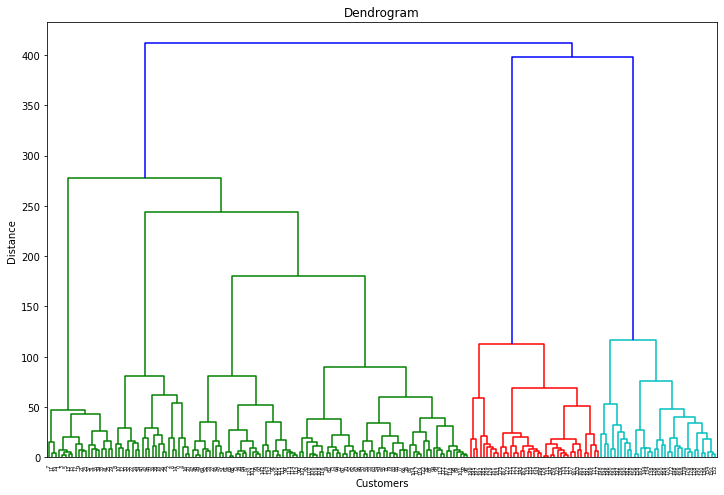

In [ ]:
#Check the dendrogram 
plt.figure(figsize = (12, 8))
dendogram = sch.dendrogram(sch.linkage(X_pc, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [ ]:
#Use Agglomerative Clustering, cutting the distance in 200
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

# Fit the model with data and predict
y_pc_hc = hc.fit_predict(X_pc)
y_pc_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [ ]:
#Show the new dataset
X_pc_hc = X_pc.copy()
X_pc_hc['cluster'] = y_pc_hc
X_pc_hc.head()

,Age,Annual Income,Spending Score,cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


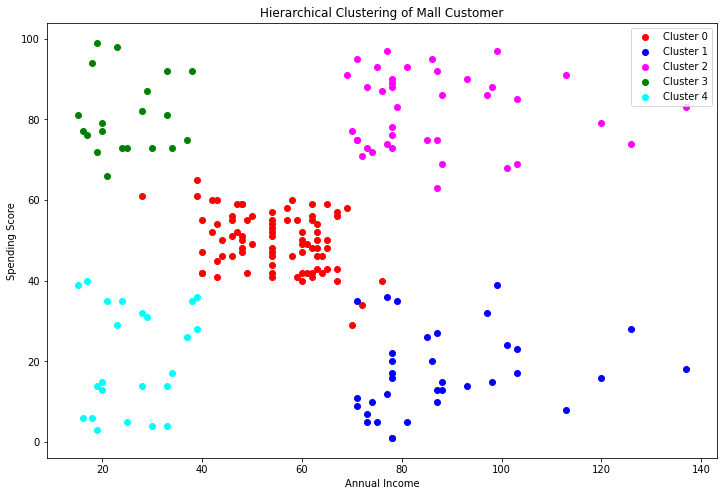

In [ ]:
# Visualization 2D
plt.figure(figsize = (12, 8))
plt.scatter(X_pc_hc.loc[X_pc_hc['cluster'] == 0, 'Annual Income'], X_pc_hc.loc[X_pc_hc['cluster'] == 0, 'Spending Score'], c = 'red', label = 'Cluster 0')
plt.scatter(X_pc_hc.loc[X_pc_hc['cluster'] == 1, 'Annual Income'], X_pc_hc.loc[X_pc_hc['cluster'] == 1, 'Spending Score'], c = 'blue', label = 'Cluster 1')
plt.scatter(X_pc_hc.loc[X_pc_hc['cluster'] == 2, 'Annual Income'], X_pc_hc.loc[X_pc_hc['cluster'] == 2, 'Spending Score'], c = 'magenta', label = 'Cluster 2')
plt.scatter(X_pc_hc.loc[X_pc_hc['cluster'] == 3, 'Annual Income'], X_pc_hc.loc[X_pc_hc['cluster'] == 3, 'Spending Score'], c = 'green', label = 'Cluster 3')
plt.scatter(X_pc_hc.loc[X_pc_hc['cluster'] == 4, 'Annual Income'], X_pc_hc.loc[X_pc_hc['cluster'] == 4, 'Spending Score'], c = 'cyan', label = 'Cluster 4')
plt.title('Hierarchical Clustering of Mall Customer')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [ ]:
# Visualization 3D
X_pc_hc['cluster'] = X_pc_hc['cluster'].astype('category')
fig = px.scatter_3d(X_pc_hc, x = 'Annual Income', y = 'Spending Score', z='Age',
              color='cluster')
fig.show()

In [ ]:
# For dimension more than 2 variables
pd.pivot_table(X_pc_hc, values = ['Age', 'Annual Income', 'Spending Score'],
               index = "cluster", aggfunc = [np.mean, np.max, np.min, np.median])

mean                ...        median               
               Age Annual Income  ... Annual Income Spending Score
cluster                           ...                             
0        42.156627     54.759036  ...          54.0             50
1        41.685714     88.228571  ...          85.0             16
2        32.692308     86.538462  ...          79.0             83
3        24.850000     24.950000  ...          23.5             78
4        45.217391     26.304348  ...          25.0             17

[5 rows x 12 columns]

In [ ]:
#Silhouette Score Evaluation
variable = X_pc_hc[['Age', 'Annual Income', 'Spending Score']]
target = X_pc_hc['cluster']

print(silhouette_score(variable, target)) #evaluation
print(target.nunique()) # number of clusters

0.4401889024290193
5


In [ ]:
#Dunn's Index Evaluation
dist = pairwise_distances(X_pc)
dunn(dist, y_pc_hc)

0.0904475303477492

## DBSCAN

In [ ]:
#Use DBSCAN, -1 value means outliers
dbscan = DBSCAN(eps = 10, min_samples = 5)
y_pc_db = dbscan.fit_predict(X_pc)
y_pc_db

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1,
       -1,  0, -1,  0, -1,  0, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2, -1,  2,  1,  2, -1,  2, -1,  2, -1,  2, -1,  2,
       -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3,
        2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3, -1,
        3,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
#Create the new variable
X_pc_db = X_pc.copy()
X_pc_db['cluster'] = y_pc_db

In [ ]:
#Visualization 3D
X_pc_db['cluster'] = X_pc_db['cluster'].astype('category')
fig = px.scatter_3d(X_pc_db, x = 'Annual Income', y = 'Spending Score', z='Age',
              color='cluster')
fig.show()

In [ ]:
# For dimension more than 2 variables
X_pc_db = X_pc_db.loc[X_pc_db['cluster'] != -1, :]
pd.pivot_table(X_pc_db, values = ['Age', 'Annual Income', 'Spending Score'],
               index = "cluster", aggfunc = [np.mean, np.max, np.min, np.median])

mean                ...        median               
               Age Annual Income  ... Annual Income Spending Score
cluster                           ...                             
0        24.133333     24.533333  ...            24             76
1        43.227848     54.443038  ...            54             50
2        32.750000     80.875000  ...            78             86
3        41.000000     83.200000  ...            86             20

[4 rows x 12 columns]

In [ ]:
#Solhouette Score Evaluation
variable = X_pc_db[['Age', 'Annual Income', 'Spending Score']]
target = X_pc_db['cluster']
  
print(silhouette_score(variable, target)) #evaluation
print(target.nunique()) # number of clusters

0.4775931300860158
4


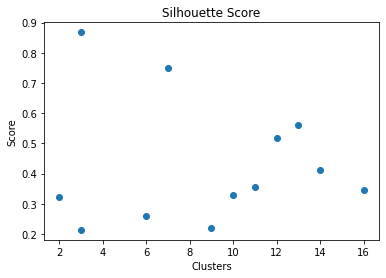

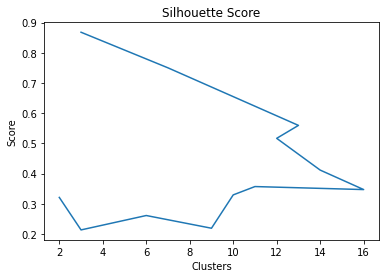

In [ ]:
#Show the Corelation of Silhouette Score with Number of Cluster
sets = []
clusters = []
for i in range(3, 15):
  y_pc_db = DBSCAN(eps = i, min_samples = 3).fit_predict(X_pc)
  
  X_pc_db = X_pc.copy()
  X_pc_db['cluster'] = y_pc_db
  X_pc_db = X_pc_db.loc[X_pc_db['cluster'] != -1, :]

  val = silhouette_score(X_pc_db[['Age', 'Annual Income', 'Spending Score']], X_pc_db['cluster'])

  clusters.append(X_pc_db['cluster'].nunique())
  sets.append(val)

plt.scatter(clusters, sets)
plt.title('Silhouette Score')
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.show()

plt.plot(clusters, sets)
plt.title('Silhouette Score')
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.show()

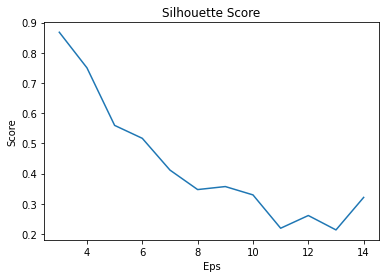

In [ ]:
#Show the Corelation of Silhouette Score with Eps Value
sets = []
clusters = []
for i in range(3, 15):
  y_pc_db = DBSCAN(eps = i, min_samples = 3).fit_predict(X_pc)
  
  X_pc_db = X_pc.copy()
  X_pc_db['cluster'] = y_pc_db
  X_pc_db = X_pc_db.loc[X_pc_db['cluster'] != -1, :]

  val = silhouette_score(X_pc_db[['Age', 'Annual Income', 'Spending Score']], X_pc_db['cluster'])

  sets.append(val)

plt.plot(range(3, 15), sets)
plt.title('Silhouette Score')
plt.xlabel('Eps')
plt.ylabel('Score')
plt.show()

In [ ]:
#Dunn's Index Evaluation
dist = pairwise_distances(X_pc)
dunn(dist, y_pc_db)

0.09885654920027873

## HDBSCAN

In [ ]:
#Use HDBSCAN
y_pc_hdb = HDBSCAN().fit(X_pc).labels_
y_pc_hdb

array([-1, -1, -1,  3, -1,  3, -1, -1, -1,  3, -1, -1, -1,  3, -1,  3, -1,
        3, -1, -1, -1,  3, -1,  3, -1,  3, -1, -1, -1, -1, -1,  3, -1, -1,
       -1,  3, -1,  3, -1, -1, -1, -1, -1, -1, -1,  2,  2,  2, -1, -1,  2,
       -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
       -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2, -1,  0, -1,  0, -1,  0, -1,  0,  1,  0, -1,  0, -1,  0,
        1,  0, -1,  0, -1,  0, -1,  0,  1,  0, -1,  0,  1,  0,  1,  0,  1,
        0,  1,  0, -1,  0, -1,  0, -1,  0, -1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0, -1,  0, -1,  0, -1,  0,  1,  0, -1,  0, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
#Create a new variable
X_pc_hd = X_pc.copy()
X_pc_hd['cluster'] = y_pc_hdb
X_pc_hd.head()

,Age,Annual Income,Spending Score,cluster
0,19,15,39,-1
1,21,15,81,-1
2,20,16,6,-1
3,23,16,77,3
4,31,17,40,-1


In [ ]:
#Visualization 3D
X_pc_hd['cluster'] = X_pc_hd['cluster'].astype('category')
fig = px.scatter_3d(X_pc_hd, x = 'Annual Income', y = 'Spending Score', z='Age',
              color='cluster')
fig.show()

In [ ]:
# For dimension more than 2 variables
X_pc_hd = X_pc_hd.loc[X_pc_hd['cluster'] != -1, :]
pd.pivot_table(X_pc_hd, values = ['Age', 'Annual Income', 'Spending Score'],
               index = "cluster", aggfunc = [np.mean, np.max, np.min, np.median])

mean                ...        median               
               Age Annual Income  ... Annual Income Spending Score
cluster                           ...                             
0        32.727273     81.060606  ...          78.0           86.0
1        41.857143     82.214286  ...          81.5           15.5
2        43.154930     55.014085  ...          54.0           50.0
3        24.833333     23.916667  ...          22.5           74.5

[4 rows x 12 columns]

In [ ]:
#Silhouette Score Evaluation
variable = X_pc_hd[['Annual Income', 'Spending Score']]
target = X_pc_hd['cluster']
  
print(silhouette_score(variable, target)) #evaluation
print(target.nunique()) # number of clusters

0.6463803671003249
4


In [ ]:
#Dunn's Index Evaluation
dist = pairwise_distances(X_pc)
dunn(dist, y_pc_hdb)

0.031267453226716695

# Cluster Description

## Boxplot

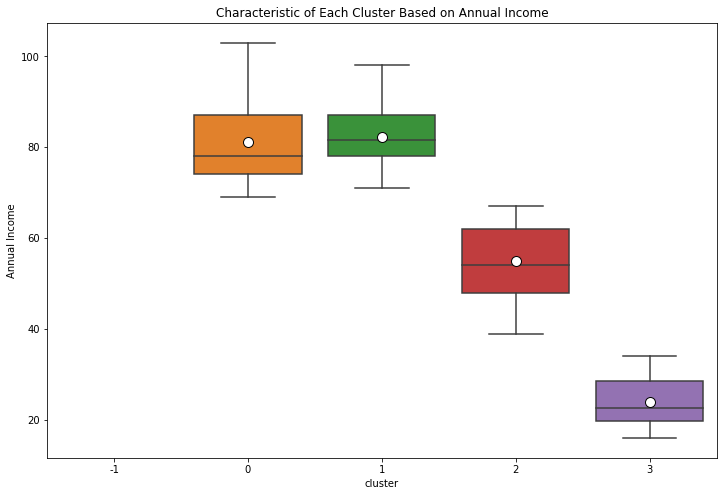

In [ ]:
#Show the boxplot of Clusters Based On Annual Income
plt.figure(figsize = (12, 8))
sns.boxplot(x="cluster", y="Annual Income", data=X_pc_hd, showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Characteristic of Each Cluster Based on Annual Income')
plt.show()

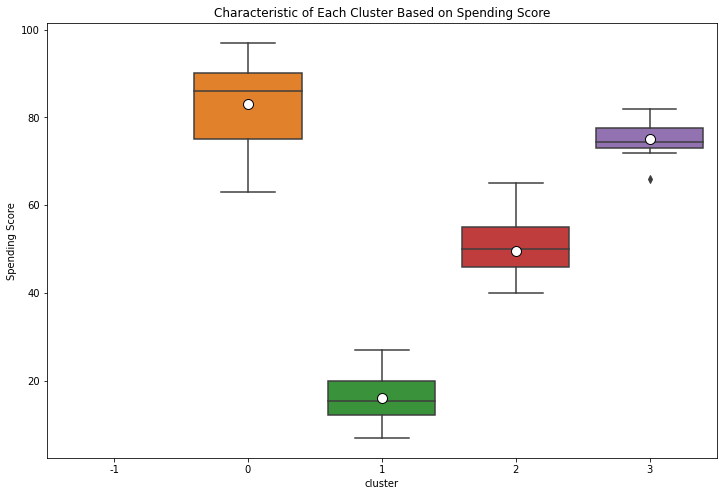

In [ ]:
#Show the boxplot of Clusters Based On Spending Score
plt.figure(figsize = (12, 8))
sns.boxplot(x="cluster", y="Spending Score", data=X_pc_hd, showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Characteristic of Each Cluster Based on Spending Score')
plt.show()

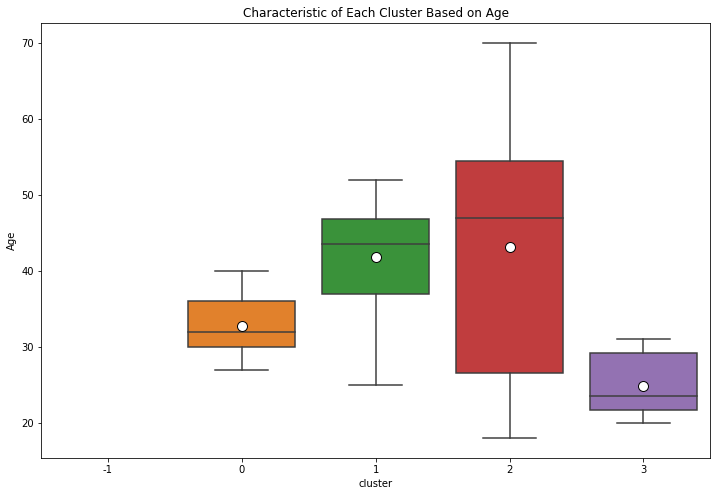

In [ ]:
#Show the boxplot of Clusters Based On Age
plt.figure(figsize = (12, 8))
sns.boxplot(x="cluster", y="Age", data=X_pc_hd, showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Characteristic of Each Cluster Based on Age')
plt.show()

## Pie Chart

In [ ]:
#Show the Pie Chart of Clusters
count = X_pc_hd['cluster'].value_counts()
px.pie(X_pc_hd, values=count, names = count.index, title='Proportion of Clusters', color_discrete_sequence = px.colors.sequential.RdBu)